<a href="https://colab.research.google.com/github/Hunterr1380/Capstone-Project-/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('creditcardfraud.csv')


In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [6]:
df.shape

(403206, 23)

In [ ]:
df.drop(columns=['Unnamed: 0', 'trans_date_trans_time',
                 'cc_num', 'category',
       'first', 'last', 'gender', 'street',
                 'city', 'state', 'zip',
       'dob', 'trans_num',
                 'unix_time'], inplace=True)

In [ ]:
df.columns

Index(['merchant', 'amt', 'lat', 'long', 'city_pop', 'job', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
x = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [ ]:
#Function Creation

import datetime
def read_data():
    merchant = input('Enter Merchant: ')
    amount = float(input('Enter Amount: '))
    lat = float(input('Enter your Latitude: '))
    long = float(input('Enter your Longitude: '))
    city_population = float(input('Enter city population: '))
    job = input('Enter Job: ')
    merch_lat = float(input("Enter Merchant's Latitude: "))
    merch_long = float(input("Enter Merchant's Longitude: "))
    user_data={
       'merchant':{0: merchant}, 'amt': {0: amount},
         'lat':{0: lat}, 'long':{0: long},
       'city_pop':{0:city_population},
       'job':{0:job}, 'merch_lat':{0:merch_lat},
       'merch_long':{0:merch_long}}
    user_data = pd.DataFrame(user_data)
    return user_data

In [ ]:
y.isna().sum()

0

In [ ]:
x.isna().sum()

merchant      0
amt           0
lat           0
long          0
city_pop      0
job           0
merch_lat     0
merch_long    0
dtype: int64

In [ ]:
x.dtypes

merchant       object
amt           float64
lat           float64
long          float64
city_pop        int64
job            object
merch_lat     float64
merch_long    float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_merchant = LabelEncoder()
x['merchant'] = le_merchant.fit_transform(
    x['merchant']).astype('int64')
le_job = LabelEncoder()
x['job'] = le_job.fit_transform(x['job']).astype('int64')
x.dtypes

merchant        int64
amt           float64
lat           float64
long          float64
city_pop        int64
job             int64
merch_lat     float64
merch_long    float64
dtype: object

<Axes: >

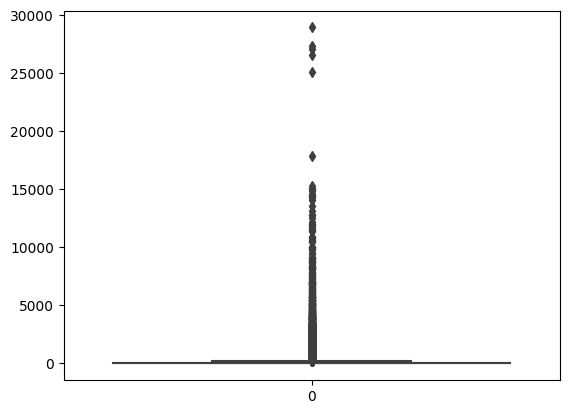

In [ ]:
import seaborn as sns

sns.boxplot(x['amt'])

<Axes: >

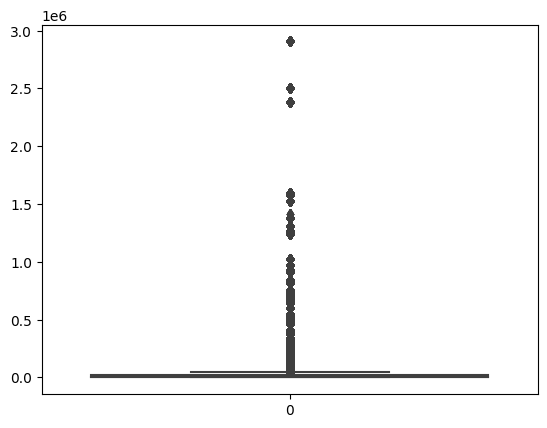

In [ ]:
sns.boxplot(x['city_pop'])

In [ ]:
x['amt'].skew()

42.277873790051174

In [ ]:
from scipy.stats import boxcox

x['amt'] = boxcox(x['amt'])[0]
x['amt'].skew()

-0.01554494300041963

In [ ]:
x['city_pop'].skew()

5.593853066842104

In [ ]:
x['city_pop'] = boxcox(x['city_pop'])[0]
x['city_pop'].skew()

0.05750405771141424

<Axes: >

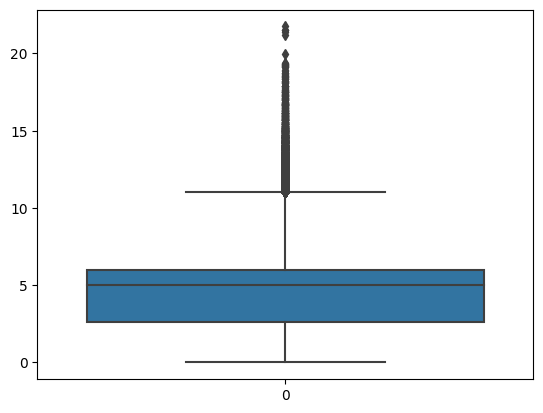

In [ ]:
sns.boxplot(x['amt'])

<Axes: >

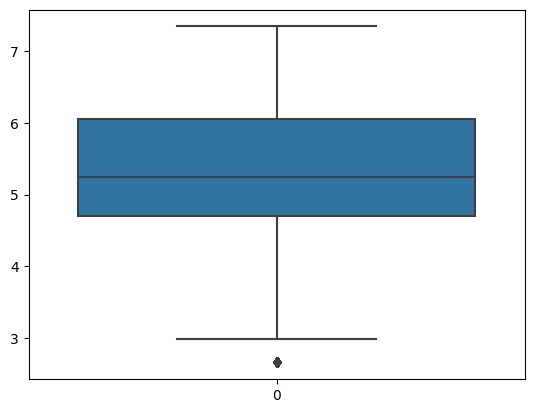

In [ ]:
sns.boxplot(x['city_pop'])

<Axes: >

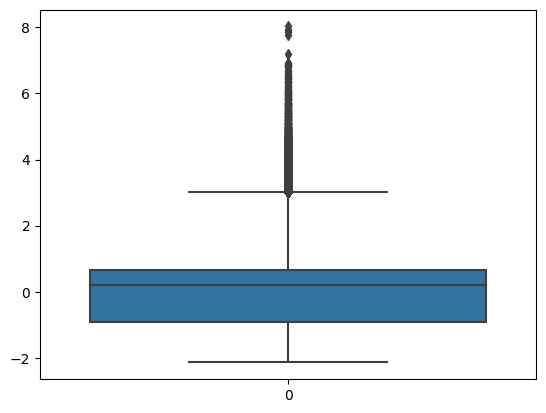

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x['amt'] = scaler.fit_transform(x[['amt']])
sns.boxplot(x['amt'])

<Axes: >

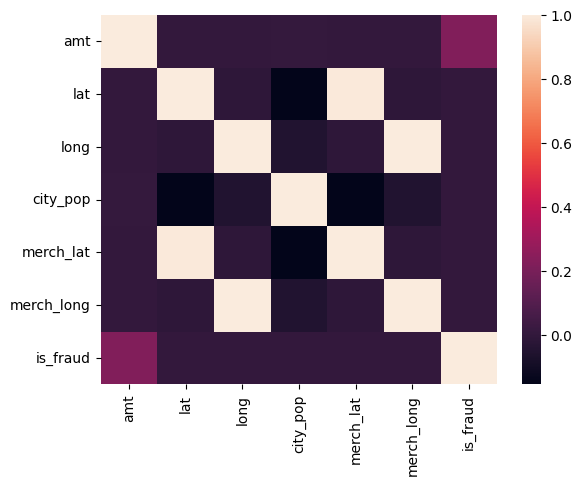

In [ ]:
sns.heatmap(df.drop(df.columns[df.dtypes=='object'], axis=1).corr())

In [ ]:
y.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [ ]:
y_zero = x[(y==0)]
del_rows = y_zero[(x['amt']>=1)|(x['amt']<=-1)]
x.drop(del_rows.index, axis=0, inplace=True)
y.drop(del_rows.index, axis=0, inplace=True)
y.value_counts()

<ipython-input-99-c7dcbb1c45d1>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del_rows = y_zero[(x['amt']>=1)|(x['amt']<=-1)]


0    857798
1      7506
Name: is_fraud, dtype: int64

<Axes: xlabel='amt'>

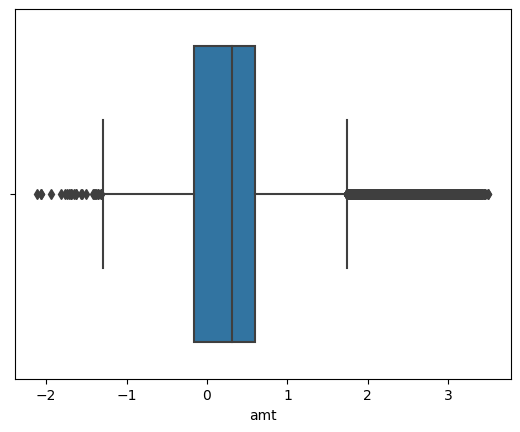

In [ ]:
sns.boxplot(x=x['amt'])

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y,
                            train_size=0.8,
                            random_state=101)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(xtrain,ytrain)


AdaBoostClassifier()

In [ ]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report

trainpred = model.predict(xtrain)
print(classification_report(ytrain, trainpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    686287
           1       1.00      0.80      0.89      5956

    accuracy                           1.00    692243
   macro avg       1.00      0.90      0.94    692243
weighted avg       1.00      1.00      1.00    692243



In [ ]:
testpred = model.predict(xtest)
print(classification_report(ytest, testpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    171511
           1       1.00      0.80      0.89      1550

    accuracy                           1.00    173061
   macro avg       1.00      0.90      0.94    173061
weighted avg       1.00      1.00      1.00    173061



In [ ]:
def get_prediction(data):
    data['merchant'] = le_merchant.transform(data['merchant'])
    data['job'] = le_job.transform(data['job'])
    amount = data[['amt']].values.reshape(1,-1)
    data['amt'] = scaler.transform(amount)
    pred = model.predict(data)
    if pred==0:
        print('It is not fraud')
    else:
        print('It is fraud')

In [ ]:
newdata = read_data()
get_prediction(newdata)

Enter Merchant: fraud_Rippin, Kub and Mann
Enter Amount: 4.97
Enter your Latitude: 36.0788
Enter your Longitude: -81.1781
Enter city population: 3495
Enter Job: Psychologist, counselling
Enter Merchant's Latitude: 36.011293
Enter Merchant's Longitude: -82.048315
It is not fraud


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
